# Brain Stroke Predicition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('brain_stroke.csv')

In [3]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
#df['stroke'].value_counts()

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df['age'].min()

0.08

In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9160\3791597834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

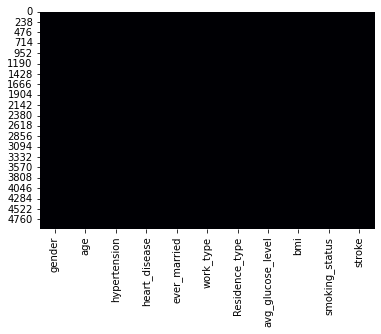

In [9]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


#### Dtype is perfect

In [11]:
st = df['stroke'].value_counts().reset_index()
st

,index,stroke
0,0,4733
1,1,248


#### Easily  shown that data is unbalanced 

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

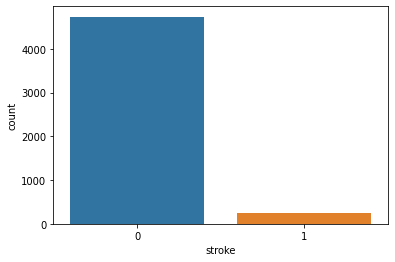

In [12]:
#sns.countplot(st_kitne) 
sns.countplot((df['stroke']))#,palette="Set3")

In [13]:
df.shape

(4981, 11)

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### visualizing Some Stats

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9160\4069054627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  smoking_stats = df[['smoking_status','stroke']].groupby(df['smoking_status']).sum()


<AxesSubplot:ylabel='smoking_status'>

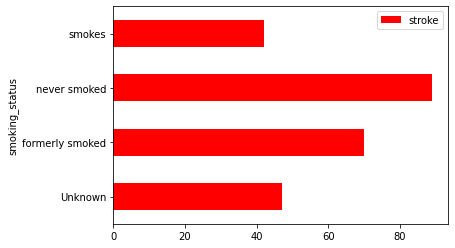

In [15]:
smoking_stats = df[['smoking_status','stroke']].groupby(df['smoking_status']).sum()
smoking_stats.plot(kind = 'barh',color ='red')

#### So according to data stroke is not related with smoking

<AxesSubplot:xlabel='gender'>

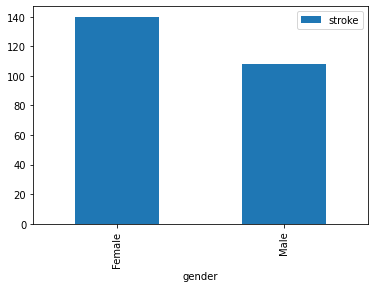

In [16]:
gender = df[['gender','stroke']].groupby('gender').sum()
gender.plot(kind='bar')             


#### Female Suffered more than male

<AxesSubplot:>

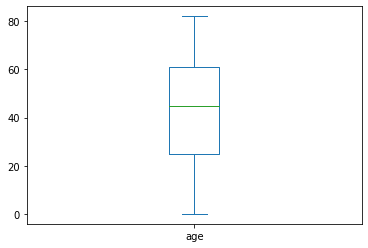

In [17]:
df['age'].plot(kind= 'box')

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


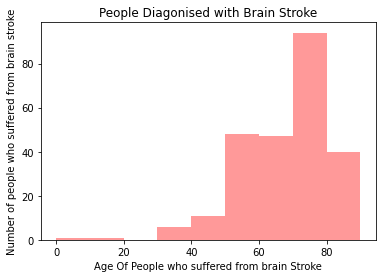

In [18]:
age_11 =df[df['stroke']== 1]['age']
age_bin = range(0,100,10)
sns.distplot(age_11 ,bins = age_bin ,color = 'red',kde =False)
#plt.ylim([0, 100])
plt.xlabel('Age Of People who suffered from brain Stroke')
plt.ylabel('Number of people who suffered from brain stroke')
plt.title('People Diagonised with Brain Stroke');
import warnings
warnings.simplefilter('ignore')

In [19]:
age_11.describe()

count    248.000000
mean      67.819839
std       12.670565
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64

#### Senior citizen   more suffered from brain stroke

<AxesSubplot:ylabel='Residence_type'>

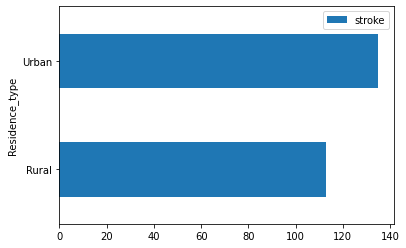

In [20]:
demo = df[['Residence_type','stroke']].groupby(df['Residence_type']).sum()
demo.plot(kind='barh')

<AxesSubplot:xlabel='ever_married'>

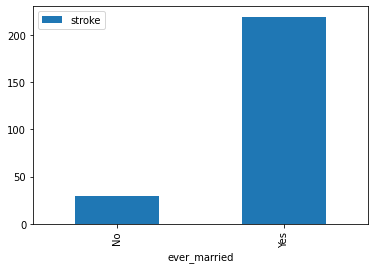

In [21]:
biyah = df[['ever_married','stroke']].groupby(df['ever_married']).sum()
biyah.plot(kind='bar')

### In our dataset there are few categorical feature so 1st i will deal with Category then check on inbalanced dataset

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])



In [25]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
5,1,74.0,1,1,1,1,0,70.09,27.4,2,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
7,0,78.0,0,0,1,1,1,58.57,24.2,0,1
8,0,81.0,1,0,1,1,0,80.43,29.7,2,1
9,0,61.0,0,1,1,0,0,120.46,36.8,3,1


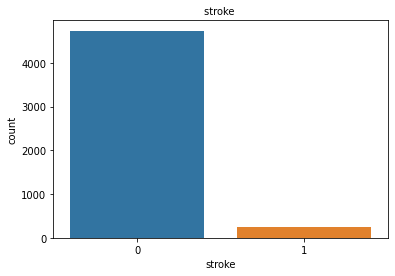

In [26]:

sns.countplot(df["stroke"]) #, palette="Set3")
plt.title("stroke ",fontsize=10)
plt.show()

In [27]:
x = df.drop(['stroke'], axis = 1)
y = df.loc[:,'stroke'].values

### Balancing the dataset

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x,y)

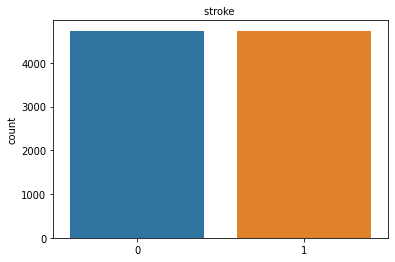

In [29]:
#checking inbalanced dataset
sns.countplot(y)#, palette="Set3")
plt.title("stroke ",fontsize=10)
plt.show()

#### scaling the datset by using standard scale

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### Using RandomforestClassifier

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predicted = rfc.predict(x_test)
Score = rfc.score(x_test,y_test)
trains = rfc.score(x_train,y_train)
print('Training Score :', trains)
print('Accuracy Using RandomforestClassifier: %.2f'% (Score))
print(classification_report(y_test, predicted))


Training Score : 1.0
Accuracy Using RandomforestClassifier: 0.95
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1175
           1       0.94      0.95      0.95      1192

    accuracy                           0.95      2367
   macro avg       0.95      0.95      0.95      2367
weighted avg       0.95      0.95      0.95      2367



In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
svc = SVC(C=5000 ,kernel ='rbf', gamma = 'auto')
svc.fit(x_train,y_train)
predicted = svc.predict(x_test)
Score = svc.score(x_test,y_test)
trains = svc.score(x_train,y_train)
print('Training Score :', trains)
print('Accuracy Using svc: %.2f'% (Score))
print(classification_report(y_test, predicted))

Training Score : 0.9498520918439217
Accuracy Using svc: 0.89
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1175
           1       0.87      0.93      0.90      1192

    accuracy                           0.89      2367
   macro avg       0.90      0.89      0.89      2367
weighted avg       0.90      0.89      0.89      2367



In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
lr = LogisticRegression()
lr.fit(x_train,y_train)
predicted = lr.predict(x_test)
Score = lr.score(x_test,y_test)
trains = lr.score(x_train,y_train)
print('Training Score :', trains)
print('Accuracy Using LogisticRegression: %.2f'% (Score))
print(classification_report(y_test, predicted))

Training Score : 0.814058318072968
Accuracy Using LogisticRegression: 0.81
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1194
           1       0.79      0.83      0.81      1173

    accuracy                           0.81      2367
   macro avg       0.81      0.81      0.81      2367
weighted avg       0.81      0.81      0.81      2367



In [35]:
from sklearn.model_selection import KFold
kfold = KFold(10)
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = SVC(C=4 ,kernel ='rbf', gamma = 'auto')

In [36]:
from sklearn.model_selection import cross_val_score
rFC= cross_val_score(model1,x,y, cv= kfold)
print(rFC)
print('Accurucy by using RandomForestClassifier :%.2f'% (np.mean(rFC)))

[0.86272439 0.9218585  0.9218585  0.90601901 0.9155227  0.94403379
 0.97040169 0.97674419 0.96300211 0.97463002]
Accurucy by using RandomForestClassifier :0.94


In [37]:
from sklearn.model_selection import cross_val_score
lr= cross_val_score(model2,x,y, cv= kfold)
print(lr)
print('Accurucy by using LogisticRegression :%.2f'% (np.mean(lr)))

[0.74340021 0.76451954 0.75184794 0.74973601 0.76663147 0.80887012
 0.83192389 0.80338266 0.78858351 0.81606765]
Accurucy by using LogisticRegression :0.78


In [38]:
from sklearn.model_selection import cross_val_score
svc= cross_val_score(model3,x,y, cv= kfold)
print(svc)
print('Accurucy by using SVC :%.2f'% (np.mean(svc)))

[0.74868004 0.77930306 0.78880676 0.79303062 0.78880676 0.89862724
 0.9154334  0.91014799 0.87632135 0.91437632]
Accurucy by using SVC :0.84


## Using Ensamble method for Classification

In [39]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [40]:
#!pip install xgboost

In [41]:
model = xgb.XGBClassifier(learning_rate = 0.3,max_depth =5 ,n_estimator =100)



In [42]:

model.fit(x_train,y_train)
model_predict = model.predict(x_test)


[23:50:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [43]:
Score_1 = model.score(x_test,y_test)
trains_2 = model.score(x_train,y_train)

print('Accuracy Using XGBoost: %.2f'% (Score_1))
print('Trained Score using XGBoost: %.2f'% (trains_2))
print(classification_report(y_test, model_predict))

Accuracy Using XGBoost: 0.94
Trained Score using XGBoost: 0.98
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1194
           1       0.93      0.95      0.94      1173

    accuracy                           0.94      2367
   macro avg       0.94      0.94      0.94      2367
weighted avg       0.94      0.94      0.94      2367



In [44]:
from sklearn.metrics import roc_curve ,auc, roc_auc_score

#calculate the false positive rate and true positive rate
fpr, tpr ,thresholds =roc_curve(y_test,model_predict)

In [45]:
# calculate the area under the roc curve
roc_auc =auc(fpr,tpr)
roc_auc.round(2)

0.94

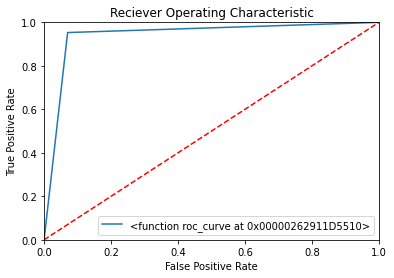

In [46]:
#plot the roc curve
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,label = roc_curve)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

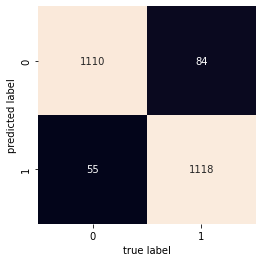

In [47]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,model_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
            #,xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

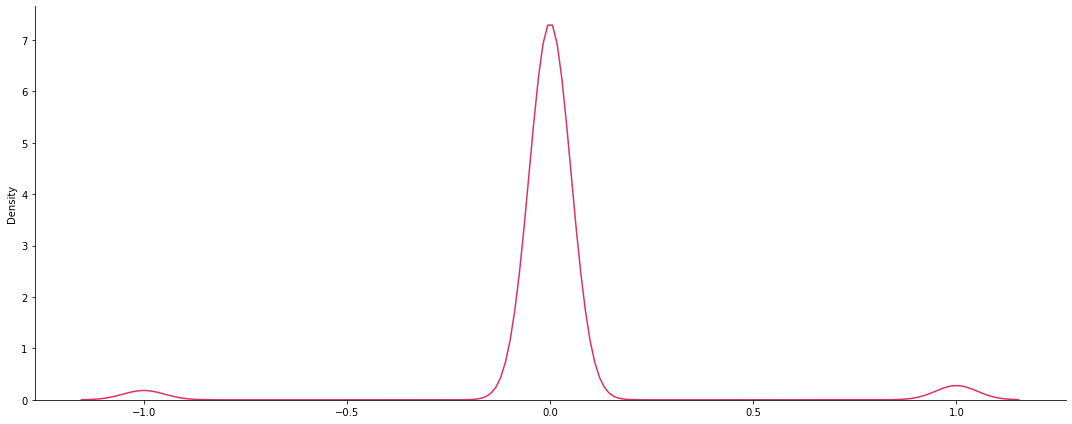

In [48]:
sns.displot(model_predict-y_test, kind = 'kde', height = 6, aspect = 2.5, color = "#DE3163")

### AdaBoost Classification

In [49]:
clfs = AdaBoostClassifier()
clfs.fit(x_train,y_train)
y_pred_Ada = clfs.predict(x_test)

In [50]:
Score_01 = clfs.score(x_test,y_test)
trains_012 = clfs.score(x_train,y_train)

In [51]:
print('Accuracy Using AdaBoost : %.2f'% (Score_01))
print('Trained Score using AdaBoost: %.2f'% (trains_012))


Accuracy Using AdaBoost : 0.83
Trained Score using AdaBoost: 0.85


# Pipeline

In [52]:
model = xgb.XGBClassifier(learning_rate = 0.3,max_depth =5 ,n_estimator =100)

In [53]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(scaler, model)

In [54]:
pipe.fit(x_train,y_train)

[23:50:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimator=100, n_estimators=100, n_jobs=0,
                 

In [55]:
y_pred = pipe.predict(x_test)

In [56]:
test_score = pipe.score(x_test,y_test)

In [57]:
train_score = pipe.score(x_train,y_train)

In [58]:
print('Accuracy Using XGBoost: %.2f'% (test_score))
print('Trained Score using XGBoost: %.2f'% (train_score))
print(classification_report(y_test, y_pred))

Accuracy Using XGBoost: 0.94
Trained Score using XGBoost: 0.98
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1194
           1       0.93      0.95      0.94      1173

    accuracy                           0.94      2367
   macro avg       0.94      0.94      0.94      2367
weighted avg       0.94      0.94      0.94      2367



In [59]:
# pickle

import pickle
pickle.dump(pipe, open('XGBoostClassifier.pkl', 'wb'))